In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [70]:
data=pd.read_csv("Retail_Store.csv",encoding = "ISO-8859-1")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [71]:
data.shape

(541909, 8)

In [72]:
#Na handling
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [73]:
#dropping the na cells
data=data.dropna()

In [74]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [75]:
#Here Adding Amount column by multiplying Quantity,UnitPrice
data['Amount'] = data['Quantity'] * data['UnitPrice']
data.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00


In [76]:
#Fidning total amount spent per Customer
monetary = data.groupby('CustomerID')['Amount'].sum()
monetary = monetary.reset_index()
monetary.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [77]:
#Frquency of customer
#How many orders made  by each customer
freq=data.groupby('CustomerID')['InvoiceNo'].count()
freq=freq.reset_index()
freq.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [78]:
#Merging Freq and monetary columns

df=monetary.merge(freq , on ='CustomerID', how ='inner')
df.head()

,CustomerID,Amount,InvoiceNo
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [80]:
# Finding recent date
maximum = max(data.InvoiceDate)
maximum

'31-10-2011 17:13'

In [62]:
type(data.InvoiceDate[3])

str

In [81]:
##converting date and time from datetime column
import datetime
from datetime import datetime
data.InvoiceDate= data.InvoiceDate.apply(lambda x: datetime.strptime(x, '%d-%m-%Y %H:%M'))

In [82]:
# Finding recent date
maximum = max(data.InvoiceDate)
maximum

Timestamp('2011-12-09 12:50:00')

In [83]:
from datetime import timedelta

maximum = maximum + timedelta(days = 1)
maximum

Timestamp('2011-12-10 12:50:00')

In [84]:
data['diff'] = maximum - data.InvoiceDate
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,374 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,374 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,374 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,374 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,374 days 04:24:00


In [85]:
#Dataframe merging by recency
recency = data.groupby('CustomerID')['diff'].min()
recency = recency.reset_index()
recency.head()

,CustomerID,diff
0,12346.0,326 days 02:33:00
1,12347.0,2 days 20:58:00
2,12348.0,75 days 23:37:00
3,12349.0,19 days 02:59:00
4,12350.0,310 days 20:49:00


In [86]:
#Combining all recency, frequency and monetary parameters
RFM = df.merge(recency, on = "CustomerID")
RFM.columns = ['CustomerID','Amount','Frequency','Recency']
RFM.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,326 days 02:33:00
1,12347.0,4310.00,182,2 days 20:58:00
2,12348.0,1797.24,31,75 days 23:37:00
3,12349.0,1757.55,73,19 days 02:59:00
4,12350.0,334.40,17,310 days 20:49:00


In [88]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4372 entries, 0 to 4371
Data columns (total 4 columns):
CustomerID    4372 non-null float64
Amount        4372 non-null float64
Frequency     4372 non-null int64
Recency       4372 non-null timedelta64[ns]
dtypes: float64(2), int64(1), timedelta64[ns](1)
memory usage: 170.8 KB


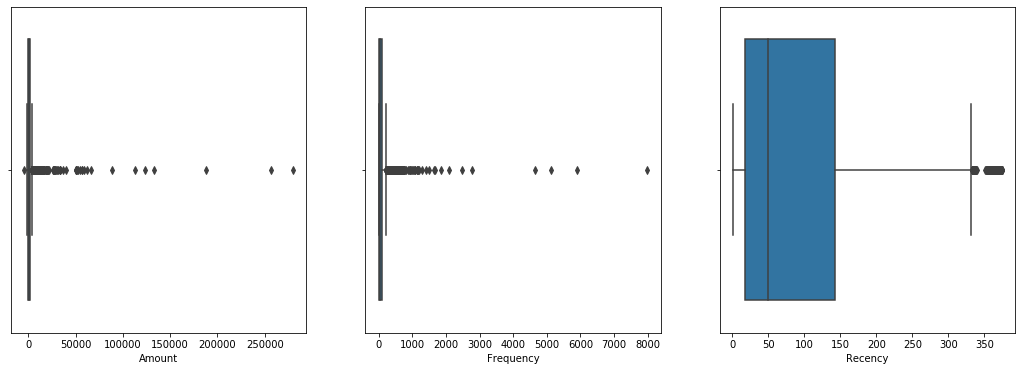

In [98]:
#Out lier treament
import seaborn as sns

fig, axs = plt.subplots(1,3, figsize = (18,6))

sns.boxplot(RFM.Amount, ax = axs[0])
sns.boxplot(RFM.Frequency, ax = axs[1])
sns.boxplot(RFM.Recency.dt.days, ax = axs[2])
plt.tight_layout
plt.show()

In [99]:
# outlier treatment for Amount
Q1 = RFM.Amount.quantile(0.25)
Q3 = RFM.Amount.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Amount >= Q1 - 1.5*IQR) & (RFM.Amount <= Q3 + 1.5*IQR)]

In [100]:
# outlier treatment for Frequency
Q1 = RFM.Frequency.quantile(0.25)
Q3 = RFM.Frequency.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Frequency >= Q1 - 1.5*IQR) & (RFM.Frequency <= Q3 + 1.5*IQR)]

In [101]:
# outlier treatment for Recency
Q1 = RFM.Recency.quantile(0.25)
Q3 = RFM.Recency.quantile(0.75)
IQR = Q3 - Q1
RFM = RFM[(RFM.Recency >= Q1 - 1.5*IQR) & (RFM.Recency <= Q3 + 1.5*IQR)]

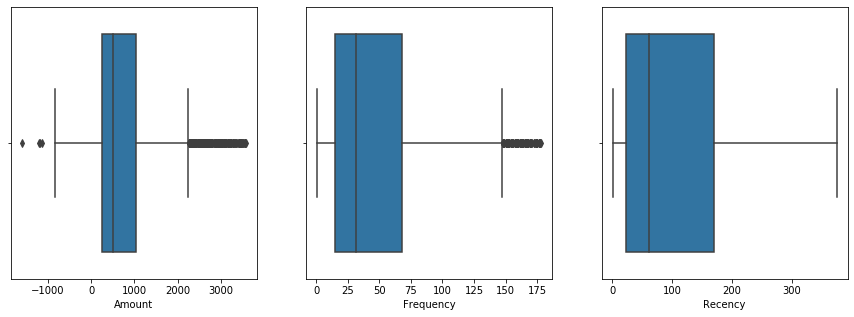

In [104]:
fig, axs = plt.subplots(1,3, figsize = (15,5))

sns.boxplot(RFM.Amount, ax = axs[0])
sns.boxplot(RFM.Frequency, ax = axs[1])
sns.boxplot(RFM.Recency.dt.days, ax = axs[2])

plt.tight_layout
plt.show()

In [105]:
RFM.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,326 days 02:33:00
2,12348.0,1797.24,31,75 days 23:37:00
3,12349.0,1757.55,73,19 days 02:59:00
4,12350.0,334.40,17,310 days 20:49:00
5,12352.0,1545.41,95,36 days 22:13:00


In [114]:
# standardise all parameters
RFM_norm1 = RFM.drop("CustomerID", axis=1)
RFM_norm1.Recency = RFM_norm1.Recency.dt.days
RFM_norm1.head()

,Amount,Frequency,Recency
0,0.00,2,326
2,1797.24,31,75
3,1757.55,73,19
4,334.40,17,310
5,1545.41,95,36


In [116]:
#Scaling the RFM data
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
RFM_norm1 = standard_scaler.fit_transform(RFM_norm1)

In [117]:
RFM_norm1 = pd.DataFrame(RFM_norm1)
RFM_norm1.columns = ['Frequency','Amount','Recency']
RFM_norm1.head()

,Frequency,Amount,Recency
0,-1.041614,-1.070949,2.136422
1,1.385298,-0.375498,-0.282050
2,1.331702,0.631707,-0.821629
3,-0.590055,-0.711233,1.982257
4,1.045238,1.159290,-0.657828


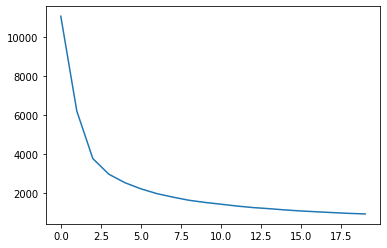

In [119]:
#Sum of Squared Distances
from sklearn.cluster import KMeans
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=100)
    model_clus.fit(RFM_norm1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [124]:
# Kmeans with K=5
cluster = KMeans(n_clusters = 5, max_iter=50)
cluster.fit(RFM_norm1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [125]:
RFM.index = pd.RangeIndex(len(RFM.index))
RFM_km = pd.concat([RFM, pd.Series(cluster.labels_)], axis=1)
RFM_km.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency', 'ClusterID']
RFM_km.head()

,CustomerID,Amount,Frequency,Recency,ClusterID
0,12346.0,0.00,2,326 days 02:33:00,3
1,12348.0,1797.24,31,75 days 23:37:00,2
2,12349.0,1757.55,73,19 days 02:59:00,2
3,12350.0,334.40,17,310 days 20:49:00,3
4,12352.0,1545.41,95,36 days 22:13:00,1


In [128]:
RFM_km.Recency = RFM_km.Recency.dt.days
km_clusters_amount = pd.DataFrame(RFM_km.groupby(["ClusterID"]).Amount.mean())
km_clusters_frequency = pd.DataFrame(RFM_km.groupby(["ClusterID"]).Frequency.mean())
km_clusters_recency = pd.DataFrame(RFM_km.groupby(["ClusterID"]).Recency.mean())

In [129]:
df = pd.concat([pd.Series([0,1,2,3,4]), km_clusters_amount, km_clusters_frequency, km_clusters_recency], axis=1)
df.columns = ["ClusterID", "Amount_mean", "Frequency_mean", "Recency_mean"]
df.head()

,ClusterID,Amount_mean,Frequency_mean,Recency_mean
0,0,357.191851,23.322368,57.556287
1,1,912.557139,114.021798,53.980926
2,2,1201.021897,53.631195,50.163265
3,3,327.037096,20.558856,262.393839
4,4,2471.402482,117.888283,38.198910


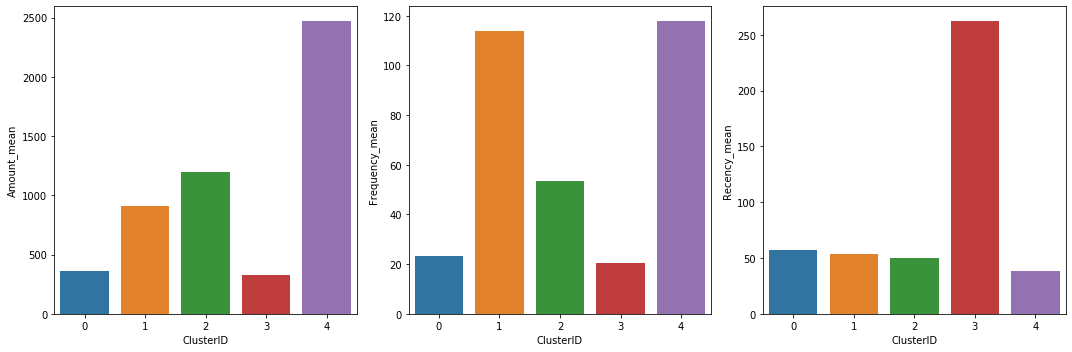

In [130]:
fig, axs = plt.subplots(1,3, figsize = (15,5))

sns.barplot(x=df.ClusterID, y=df.Amount_mean, ax = axs[0])
sns.barplot(x=df.ClusterID, y=df.Frequency_mean, ax = axs[1])
sns.barplot(x=df.ClusterID, y=df.Recency_mean, ax = axs[2])
plt.tight_layout()            
plt.show()

# Inferences
On RFM analysis it was found that Customers with Cluster ID 4 are the best and loyal customers.
Cluster Id 3 are customers who are not interested in retail store.
People with cluster ID 0,1,2 needs targeted marketing marketing based on their demographics, buying pattern etc.